# Notebook 2:  Laser evolution


LWFA Workbook II

This is the second notebook on LWFA where we explore the evolution of the laser using 1D moving window simulations to understand the effects of pump depletion and dephasing.



OSIRIS simulations are done in normalized units. 

* Time:  $t' = t \omega_{p}$

* Frequency: $\omega' = \frac{\omega}{\omega_{p}}$ 

* Position: $\vec{x}' = \frac{\omega_{p}}{c} \vec{x}$  

* Momenta: $\vec{u}' = \frac{\vec{p}}{m_{e} c} = \frac{\vec{\gamma v}}{c} = \frac{\vec{u}} {c}$  

* Electric field: $\vec{E}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{E}$  

* Magnetic field: $\vec{B}' = e \frac{c / \omega_{p}}{m_{e} c^2} \vec{B}$  


In [1]:
# **********************************
# First Run This Cell to 
# import the necessary libraries
# **********************************
#
# Please run this cell before running anything, and run this cell again if you have restarted the 
# python kernel.
#
# This cell imports useful routines to diagnose the simulations here
#

%matplotlib inline
import osiris
from osiris import tajima
from tajima_helper import plot_maxgamma_t, newifile, newifile2, laser_envelope, tajima_widget2, tajima_moving_widget, xt_and_energy_plot,xt_and_energy_plot2,k_plot2
import numpy as np
import matplotlib.pyplot as plt
from osh5vis import osplot
from osh5io import read_h5
from osh5utils import fft
from ipywidgets import interact_manual,Layout,interact, FloatSlider
import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")

%load_ext autoreload
%autoreload 2

## Here we illustrate and explore the OSIRIS pulse shape:

In these 1D simulations the laser envelope has a shape in time.  This shape is often approximated by a Gaussian with a width $\sigma_t$.  However, in a simulation the laser envelope cannot be a Gaussian because it will lead to infinitely long pulses in time.  To make the laser shape finite OSIRIS uses a polynomial function 

$ P(\tau) = \tau + \tau + \tau$

where $\tau = t/t_{rise}$ 

In [2]:
# This cell shows the laser envelope shape for given t_rise, t_fall, and Lt.  
#
interact(laser_envelope, trise=FloatSlider(min=0.00, max=5, step=.05, description='$t_{rise}$', value = 1.57),
         tflat=FloatSlider(min=0.00, max=5, step=.05, description='$Lt$', value = 0),
         tfall=FloatSlider(min=0.00, max=5, step=.05, description='$t_{fall}$', value = 1.57));

interactive(children=(FloatSlider(value=1.57, description='$t_{rise}$', max=5.0, step=0.05), FloatSlider(value…

# Laser Evolution in Propagation:

There are many different effects which can cause a laser to evolve in time or space. Here we will look at a couple different ways the laser can evolve in a 1D wake, namely dephasing and pump depletion from a couple points of view.

## Wakefield exitation

$$ \Psi = \int_{-\infty} ^ {\infty} d\xi^\prime \frac{a_0^2 (\xi^\prime)}{4} \sin{k_p}(\xi - \xi^\prime) $$

## Dephasing

First we look at the light dispersion in a plasma, and look at the effects of dephasing, where the energetic electrons outrun the laser and the plasma waves.  

In an unmagnetized plasma, the dispersion for light wave is:

$\omega^2 = \omega_p^2 + k^2 c^2$

and a laser packet moves at the group velocity which can be derived from the above relation:

$v_g = \frac{c^2} {v_{\phi}}$

and the wake, which is created by the ponderomotive pressure of the laser (i.e., the laser packet/envelope) also moves at $v_g$.  

Laser dephasing describes the process where the energetic electrons outrun the laser.  This is an important consideration in the design of plasma based LWFA's as it is important to take the electrons out of the accelerating structure as soon as it has reached the highest possible energy.  The length of the plasma in LWFA's is typically on the order of the dephasing length, which is the distance for energetic electrons (moving at the speed of light) to outrun the laser packet and the accelerating structure.  

$L = c \frac{\lambda_p/4 }{c - v_g}$

where we assumed the electrons are injected at the point of highest gradient and it outruns the wake after it has traveled $\lambda/4$ in the wake frame and reaches the decelerating part of the plasma wake.

## Pump Depletion

Another aspect of laser evolution in a wake is pump depletion. In order for a laser to excite a wake in a plasma, energy must be transferred from the laser to the wake. This introduces a physical limit on the total amount of energy in the wake, which in turn limits the ability of a LWFA to accelerate particles. This begs the question - how quickly does our pump laser lose energy? This is the same as asking over what distance our accelerator accelerates particles. 

We will look at the issue of laser pump depletion length from two points of view. First, we will look at global energy conservation, where all of the energy contained in the laser pulse is transferred to the wake. Next, we will use the local acceleration/deceleration of photons, equivalent to the local conservation of photon number, to arrive at the same conclusion.  

### Global Conservation of Energy

The energy of the laser field is 
\begin{equation}
     w_{L}^{2}c\tau_{L}\frac{E_{L}^{2}}{8\pi},
\end{equation}
where $w_{L}$ and $\tau_{L}$ are the spot size and pulse length of the laser, respectively, and $E_{L}$ is the average electric field of the laser. Meanwhile, the wake will have a similar expression for its energy:
\begin{equation}
    w_{w}^{2}L_{pd}\frac{E_{w}^{2}}{8\pi},
\end{equation}
where instead of $c\tau_{L}$ for the longitudinal extent of the laser, we have used $L_{pd}$, the pump depletion length. Setting these energies equal to each other (100\% pump depletion - does this make physical sense?), an expression for the pump depletion length is found:
\begin{equation}
    L_{pd} = \frac{w_{L}^{2}}{w_{w}^{2}}\frac{E_{L}^{2}}{E_{w}^{2}}c\tau_{L}.
\end{equation}

With the usual normalizations $a = eE_{L}/mc\omega_{0}$ and $\epsilon = eE_{w}/mc\omega_{p}$, and rewriting in terms of the ponderomotive potential $\phi_{p} = a^{2}/4$, the pump depletion length becomes
\begin{equation}
    L_{pd} = \frac{w_{L}^{2}}{w_{w}^{2}}\frac{4\phi_{p}}{\epsilon^{2}}\frac{\omega_o^2}{\omega_p^2}\frac{c}{\omega_{p}}\tau_{L}\omega_{p}.
\end{equation}
Taking the reasonable assumptions that $\tau_{L}\omega_{p} \approx 1$ and $\frac{w_{L}^{2}}{w_{w}^{2}} \approx 2$, our final pump depletion length is given by 
\begin{equation}\label{eq:length1}
    L_{pd} = \frac{8}{\epsilon} \frac{\omega_o^2}{\omega_p^2} \frac{c}{\omega_p}.
\end{equation}
When laser and wake dephasing occurs over a length longer than pump depletion, $L_{pd}$ will be the acceleration length and the particles being accelerated (e.g. electrons) will gain energy $eE_{w}L_{pd}$.

### Photon Deceleration

Now let's derive the same answer from a different perspective. If we assume that the total photon number, or action, is conserved, we can look at how long it takes to fully deplete the energy of each drive photon. To proceed, we need to know how $v_\phi$ of the laser evolves with the wake via the refractive index $\eta$:

\begin{equation}
    \eta = \sqrt{1-\frac{\omega_p^2}{\omega_0^2}\frac{1}{1+\Phi}} = \frac{c}{v_\phi}
\end{equation}
\begin{equation}
    \Phi = -\frac{\delta n}{n_0} + \frac{a_0^2}{2}
\end{equation}
\begin{equation}\label{eq:vphase}
    \frac{v_\phi}{c} \approx 1 + \frac{\omega_p^2}{2\omega_0^2}(1-\Phi)
\end{equation}
Next we'll look at two phase fronts of the laser that are separated by $\lambda$.
\begin{equation}\label{eq:deltav}
    \Delta v_\phi = v_{\phi 2}-v_{\phi 1} = \lambda \frac{\partial v_\phi}{\partial s} = -\lambda \frac{\partial v_\phi}{\partial\xi}
\end{equation}
As these phase fronts propagate over a distance $\Delta$s, their spacing will change.
\begin{equation}
    \Delta\lambda = \Delta v_\phi \left(\frac{\Delta s}{c}\right)
\end{equation}
Plug in our equation for $\Delta v_{\phi}$ and divide by $\lambda$,
\begin{equation*}
    -\frac{\Delta \lambda}{\lambda} = \frac{\partial v_\phi}{\partial\xi} \left(\frac{\Delta s}{c}\right) = \frac{\Delta\omega}{\omega}
\end{equation*}
Let's assume that the photon deceleration is limited by the laser frequency, i.e., the photons lose all of their energy: $\Delta\omega = -\omega_0$. Is this a reasonable assumption to make?
\begin{equation*}
    \frac{\Delta\omega}{\omega_o} = -1 = -\frac{\partial v_\phi}{\partial\xi} \left(\frac{\Delta s}{c}\right)
\end{equation*}
Using the derivative of our equation for $v_{\phi}/c$,
\begin{equation*}
    \left(\frac{\Delta s}{c}\right) \frac{\partial v_\phi}{\partial\xi} = \frac{1}{2} \frac{\omega_p^2}{\omega_0^2} \frac{\partial\Phi}{\partial\xi}\Delta s = 1
\end{equation*}
Now set our propagation length $\Delta s$ equal to the pump depletion length $L_{pd}$,
\begin{equation*}
    \frac{1}{2} \frac{\omega_p^2}{\omega_0^2}\frac{\partial\Phi}{\partial\xi} L_{pd} = 1
\end{equation*}
\begin{equation}\label{eq:length2}
    L_{pd} = \frac{2}{\epsilon} \frac{\omega_o^2}{\omega_p^2} \frac{c}{\omega_p}
\end{equation}
In reality, $v_g$ of the laser will come to rest before all of their energy is transferred to the wake. When will this happen?

In the following sections, we will run simulations with different laser parameters that clearly show each of these effects. After the examples, there will be a chance to fiddle with the simulation parameters to see how they affect the results.

## Case 1:  Linear ($v_{osc}/c=0.3$, $\omega_0/\omega_p = 10$)

In [3]:
## Hit <shift>+<return> to run

dirname = 'linear-a03-w10'
inputfile = dirname + '.txt'
osiris.runosiris(rundir=dirname,inputfile=inputfile)
plot_maxgamma_t(dirname)    

runosiris completed normally
max gamma =  1.0071742649611337


/opt/conda/lib/python3.7/importlib/__init__.py:127: H5pyDeprecationWarning: The h5py.highlevel module is deprecated, code should import directly from h5py, e.g. 'from h5py import File'.
  return _bootstrap._gcd_import(name[level:], package, level)


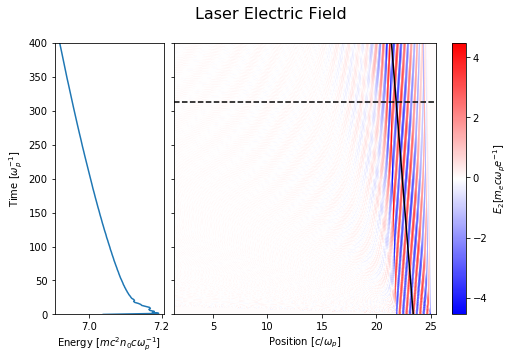

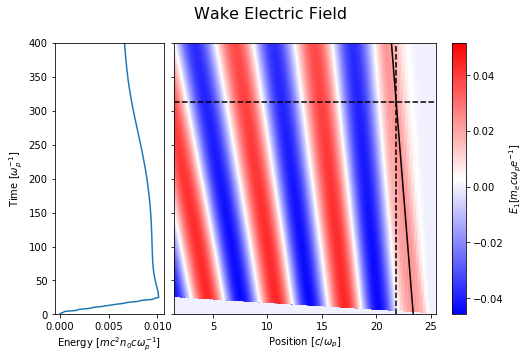

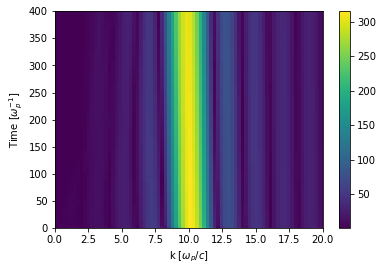

In [4]:
dirname = './linear-a03-w10'
xt_and_energy_plot2(rundir=dirname, field = 'e2')
xt_and_energy_plot2(rundir=dirname, field = 'e1')
k_plot2(rundir = dirname)

## Case 2:  Linear ($v_{osc}/c=0.3$, $\omega_0/\omega_p = 7$)

In [5]:
## Hit <shift>+<return> to run

dirname = 'linear-a03-w7'
osiris.runosiris(rundir=dirname,inputfile='linear-a03-w7.txt')
plot_maxgamma_t(dirname)    

runosiris completed normally
max gamma =  1.009752444909147


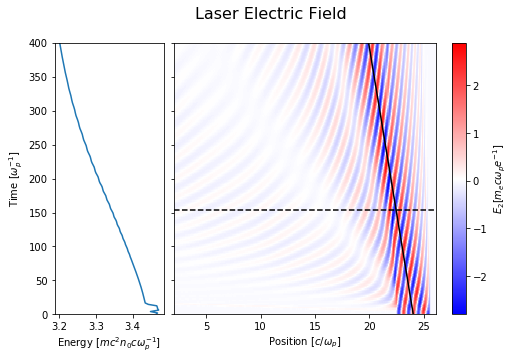

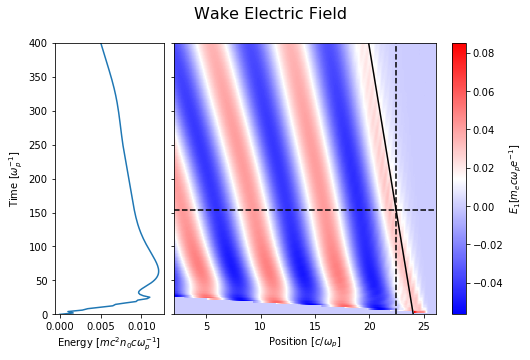

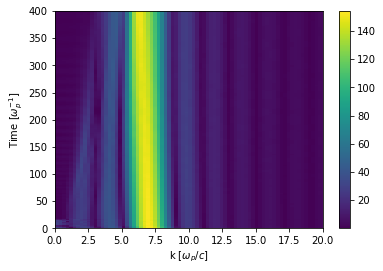

In [6]:
dirname = './linear-a03-w7'
xt_and_energy_plot2(rundir=dirname, field = 'e2')
xt_and_energy_plot2(rundir=dirname, field = 'e1')
k_plot2(rundir = dirname)

Question: Is $v_g$ of laser always approximate $v_p$ of wake?

## Case 3:  Nonlinear ($v_{osc}/c= 1$, $\omega_0/\omega_p = 10$)

In [11]:
dirname = './nonlinear-a10-w10'
osiris.runosiris(rundir=dirname,inputfile='nonlinear-a10-w10.txt')
plot_maxgamma_t(dirname)   

runosiris completed normally
max gamma =  87.20436686267331


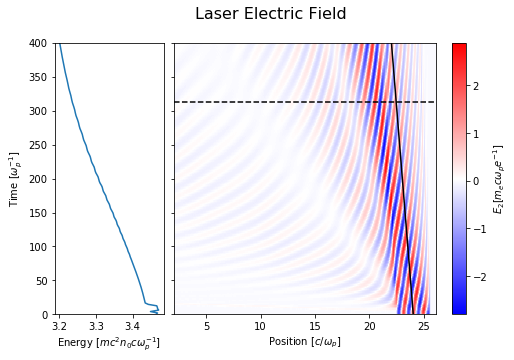

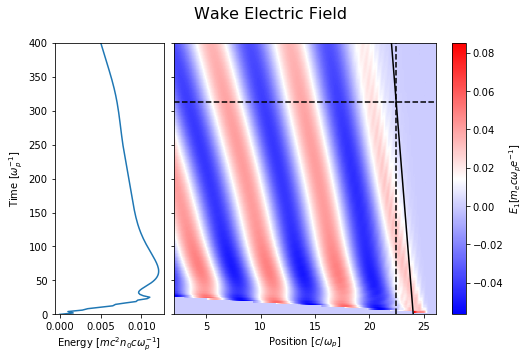

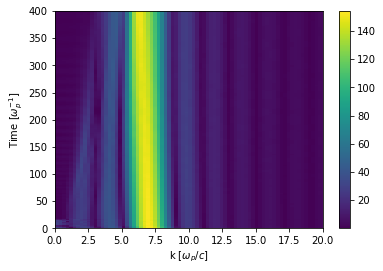

In [9]:
xt_and_energy_plot2(rundir=dirname, field = 'e2')
xt_and_energy_plot2(rundir=dirname, field = 'e1')
k_plot2(rundir = dirname)

## Customized case
The cell below allows you to explore different parameters

In [ ]:
tajima_widget2()

In [ ]:
dirname = './nonlinear-a10-w10'
xt_and_energy_plot2(rundir=dirname, field = 'e2')
xt_and_energy_plot2(rundir=dirname, field = 'e1')
k_plot2(rundir = dirname)